In [33]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
# Step 1: Load the labeled dataset
df = pd.read_csv('Labeled_MetroPT3.csv')

In [36]:
df

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,fault_status
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,15169430,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516944,15169440,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516945,15169450,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516946,15169460,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [39]:
# Step 2: Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Unnamed: 0         0
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
fault_status       0
dtype: int64


In [41]:
# Step 3: Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'timestamp'], inplace=True)

In [43]:
df

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,fault_status
0,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516943,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516944,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516945,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1516946,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


In [45]:
# Step 4: Separate features and target
X = df.drop('fault_status', axis=1)
y = df['fault_status']

In [47]:
# Step 5: Train-Test splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [49]:
print("Class distribution in y_train:")
print(pd.Series(y_train).value_counts(normalize=True))

Class distribution in y_train:
fault_status
0    0.98025
1    0.01975
Name: proportion, dtype: float64


In [51]:
# Step 6: Train Random Forest with class_weight for imbalance
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

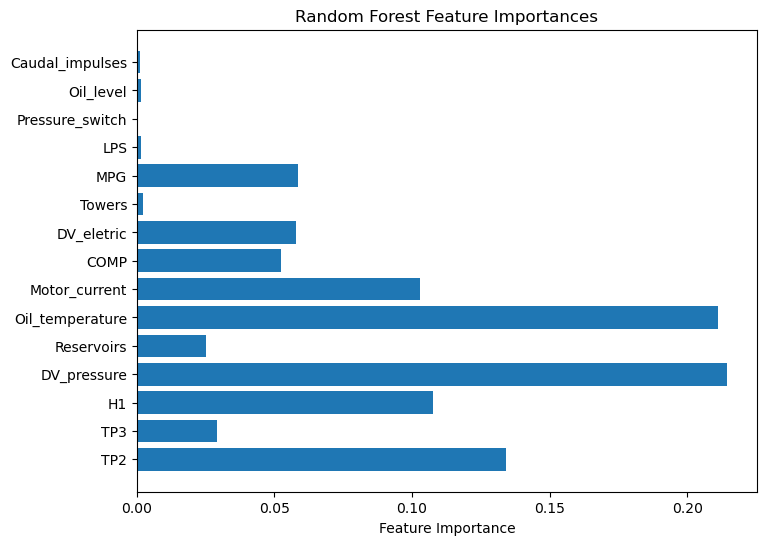

In [21]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

In [22]:
# Step 7: Predictions
y_pred = rf_model.predict(X_test)

In [23]:
# Step 8: Evaluation
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[296476    922]
 [    64   5928]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    297398
           1       0.87      0.99      0.92      5992

    accuracy                           1.00    303390
   macro avg       0.93      0.99      0.96    303390
weighted avg       1.00      1.00      1.00    303390



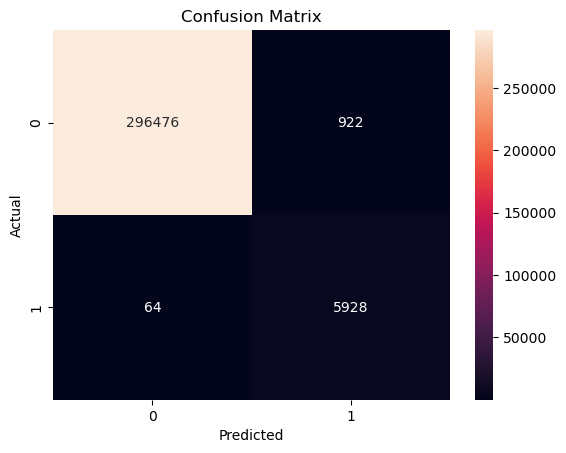

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()